In [75]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [76]:
main = pd.read_csv("car data.csv")
df = pd.read_csv("car data.csv")

In [77]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [78]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [80]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [81]:
list = [  "Fuel_Type"	,"Selling_type"	,"Transmission"	,"Owner" ]
for i in list:
  value_counts = df[i].value_counts()
  print(value_counts)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [82]:
df['Fuel_Type'].replace(['Petrol','Diesel','CNG'],[1,2,3],inplace=True)
df['Selling_type'].replace(['Dealer','Individual'],[2,1],inplace=True)
df['Transmission'].replace(['Manual','Automatic'],[1,2],inplace=True)

In [83]:
list = [  "Fuel_Type"	,"Selling_type"	,"Transmission"	,"Owner" ]
for i in list:
  value_counts = df[i].value_counts()
  print(value_counts)

Fuel_Type
1    239
2     60
3      2
Name: count, dtype: int64
Selling_type
2    195
1    106
Name: count, dtype: int64
Transmission
1    261
2     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [84]:
df['car_age'] = 2023-df['Year']
df.drop(['Year'],axis=1,inplace=True)

In [85]:
df.drop(["Car_Name"],axis=1,inplace=True)

In [86]:
df

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,3.35,5.59,27000,1,2,1,0,9
1,4.75,9.54,43000,2,2,1,0,10
2,7.25,9.85,6900,1,2,1,0,6
3,2.85,4.15,5200,1,2,1,0,12
4,4.60,6.87,42450,2,2,1,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,2,2,1,0,7
297,4.00,5.90,60000,1,2,1,0,8
298,3.35,11.00,87934,1,2,1,0,14
299,11.50,12.50,9000,2,2,1,0,6


<Axes: >

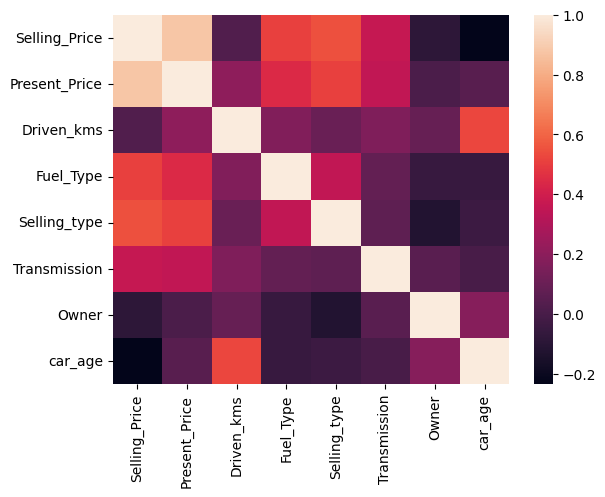

In [87]:
correlation = df.corr()
sns.heatmap(correlation, annot=False)

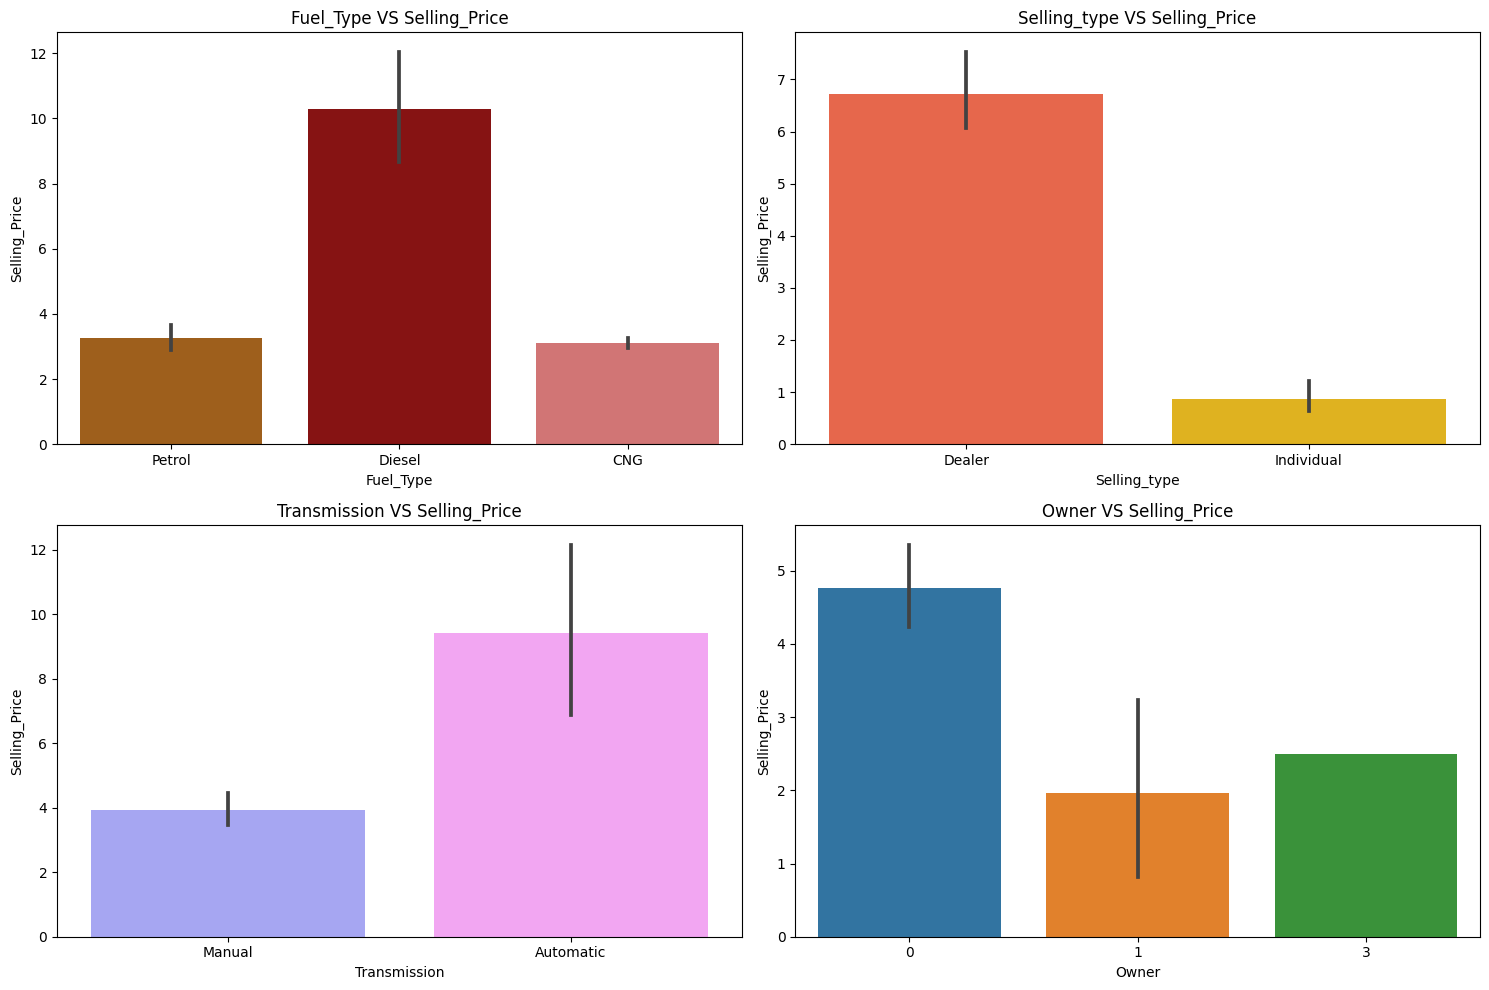

In [88]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
custom_palette = ["#b45f06", "#990000","#e06666"]
sns.barplot(main,x="Fuel_Type",y="Selling_Price",palette=custom_palette)
plt.title("Fuel_Type VS Selling_Price")

plt.subplot(2,2,2)
custom_palette = ["#FF5733", "#FFC300","#33FF57"]
sns.barplot(main,x="Selling_type",y="Selling_Price",palette=custom_palette)
plt.title("Selling_type VS Selling_Price")

plt.subplot(2,2,3)
custom_palette = ["#9999FF", "#FF99FF", "#3366FF"]
sns.barplot(main,x="Transmission",y="Selling_Price",palette=custom_palette)
plt.title("Transmission VS Selling_Price")

plt.subplot(2,2,4)
sns.barplot(main,x="Owner",y="Selling_Price")
plt.title("Owner VS Selling_Price")

plt.tight_layout()
plt.show()

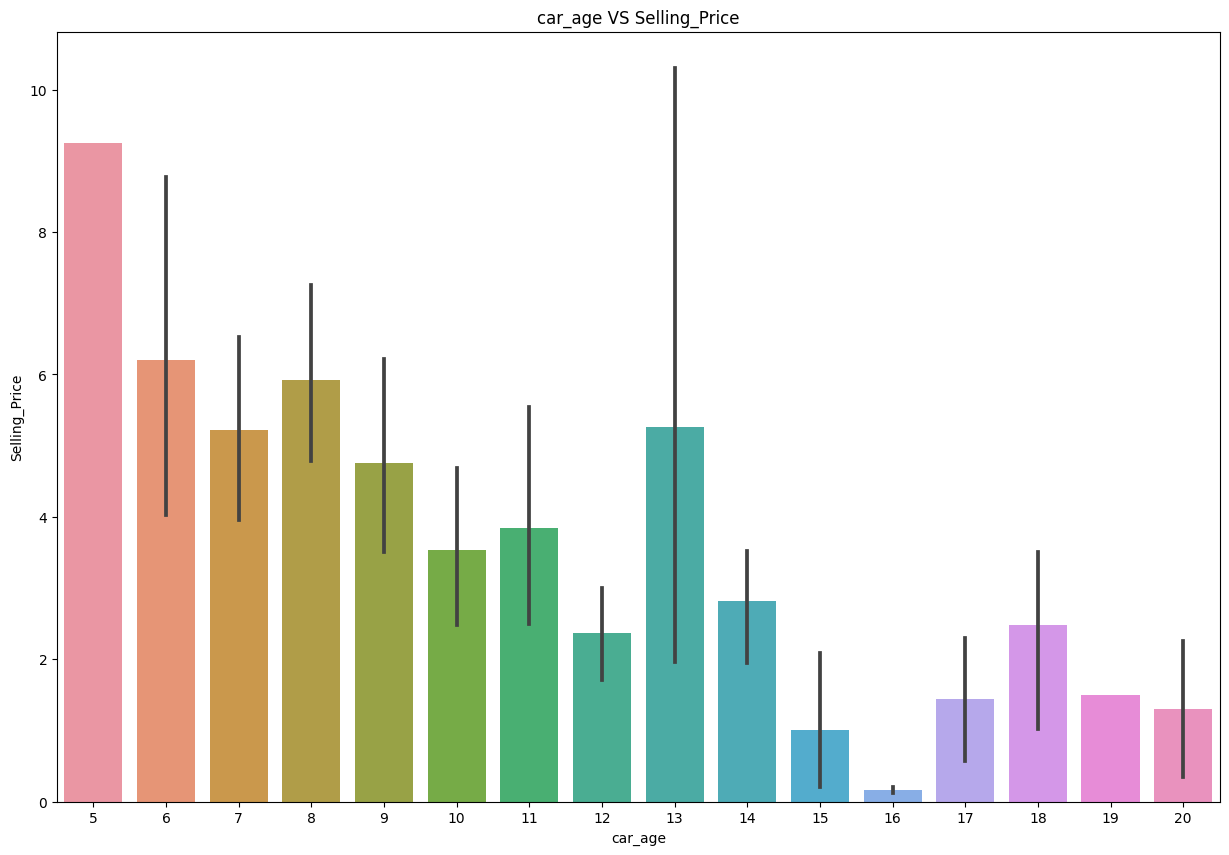

In [89]:
plt.figure(figsize=(15,10))
sns.barplot(df,x="car_age",y="Selling_Price")
plt.title("car_age VS Selling_Price")
plt.show()

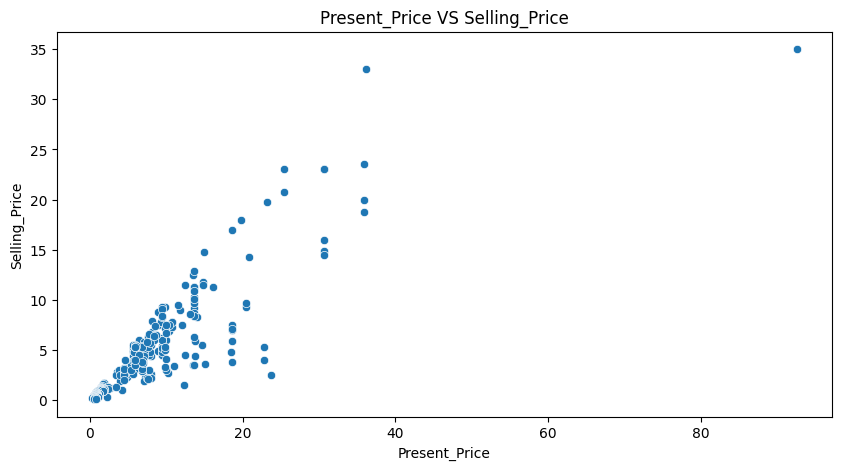

In [90]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x="Present_Price",y="Selling_Price")
plt.title("Present_Price VS Selling_Price")
plt.show()

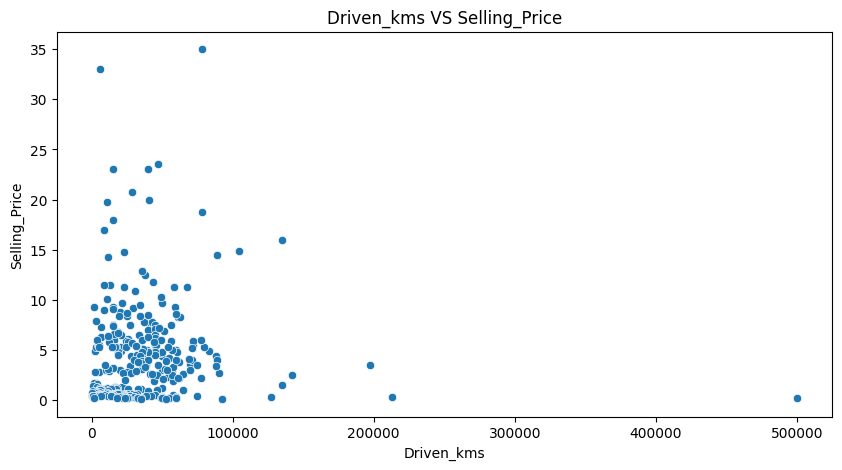

In [91]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x="Driven_kms",y="Selling_Price")
plt.title("Driven_kms VS Selling_Price")
plt.show()

In [92]:
X = df.drop(["Selling_Price"],axis =1)
y = df["Selling_Price"]
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3)

In [93]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [94]:
pred1 = model.predict(X_test)

In [95]:
acc1 = model.score(X_test,y_test)

In [96]:
acc_lr = round(acc1 * 100 , 2)
acc_lr

67.67

In [97]:
lr_r2score = r2_score(y_test,pred1)
lr_mae = mean_absolute_error(y_test,pred1)
lr_mse = mean_squared_error(y_test,pred1)
lr_rmse = np.sqrt(mean_squared_error(y_test,pred1))

In [98]:
print('LinearRegression Accuracy is : {}'.format(acc_lr))
print('LinearRegression R2 score is : {}'.format(lr_r2score))
print('LinearRegression MAE : {}'.format(lr_mae))
print('LinearRegression MSE : {}'.format(lr_mse))
print('LinearRegression RMSE : {}'.format(lr_rmse))

LinearRegression Accuracy is : 67.67
LinearRegression R2 score is : 0.6767397482667579
LinearRegression MAE : 1.3257665001976633
LinearRegression MSE : 5.375476293094077
LinearRegression RMSE : 2.318507341608837


In [99]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [100]:
pred2 = model.predict(X_test)

In [101]:
acc2 = model.score(X_test,y_test)

In [102]:
acc_dr = round(acc2 * 100 , 2)
acc_dr

90.16

In [103]:
dr_r2score = r2_score(y_test,pred2)
dr_mae = mean_absolute_error(y_test,pred2)
dr_mse = mean_squared_error(y_test,pred2)
dr_rmse = np.sqrt(mean_squared_error(y_test,pred2))

In [113]:
print('DecisionTreeRegressor Accuracy is : {}'.format(acc_dr))
print('DecisionTreeRegressor R2 score is : {}'.format(dr_r2score))
print('DecisionTreeRegressor MAE : {}'.format(dr_mae))
print('DecisionTreeRegressor MSE : {}'.format(dr_mse))
print('DecisionTreeRegressor RMSE : {}'.format(dr_rmse))

DecisionTreeRegressor Accuracy is : 90.16
DecisionTreeRegressor R2 score is : 0.9015577110964501
DecisionTreeRegressor MAE : 0.7936263736263734
DecisionTreeRegressor MSE : 1.6369912087912089
DecisionTreeRegressor RMSE : 1.2794495725862778


In [105]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
pred3 = model.predict(X_test)

In [107]:
acc3 = model.score(X_test,y_test)

In [108]:
acc_rr = round(acc3 * 100 , 2)
acc_rr

95.45

In [109]:
rr_r2score = r2_score(y_test,pred2)
rr_mae = mean_absolute_error(y_test,pred2)
rr_mse = mean_squared_error(y_test,pred2)
rr_rmse = np.sqrt(mean_squared_error(y_test,pred2))

In [114]:
print('RandomForestRegressor Accuracy is : {}'.format(acc_rr))
print('RandomForestRegressor R2 score is : {}'.format(rr_r2score))
print('RandomForestRegressor MAE : {}'.format(rr_mae))
print('RandomForestRegressor MSE : {}'.format(rr_mse))
print('RandomForestRegressor RMSE : {}'.format(rr_rmse))

RandomForestRegressor Accuracy is : 95.45
RandomForestRegressor R2 score is : 0.9015577110964501
RandomForestRegressor MAE : 0.7936263736263734
RandomForestRegressor MSE : 1.6369912087912089
RandomForestRegressor RMSE : 1.2794495725862778


In [111]:
model = pd.DataFrame({
    'Model': ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor'],
    'Accuracy_score':[acc_lr,acc_dr,acc_rr],
    'R2_Score': [lr_r2score,dr_r2score,rr_r2score],
    'MAE': [lr_mae,dr_mae,rr_mae],
    'MSE': [lr_mse,dr_mse,rr_mse],
    'RMSE': [lr_rmse,dr_rmse,rr_rmse]
                     }
                    )
model.sort_values(by='R2_Score', ascending=False)

,Model,Accuracy_score,R2_Score,MAE,MSE,RMSE
1,DecisionTreeRegressor,90.16,0.901558,0.793626,1.636991,1.279450
2,RandomForestRegressor,95.45,0.901558,0.793626,1.636991,1.279450
0,LinearRegression,67.67,0.676740,1.325767,5.375476,2.318507
